# Check Ultralytics / YOLO11 Library

In [1]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code


In [2]:
!nvidia-smi

Mon Nov 18 09:58:30 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.14                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070      WDDM  |   00000000:07:00.0  On |                  N/A |
|  0%   35C    P8             21W /  270W |     666MiB /   8192MiB |      3%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Sep_12_02:55:00_Pacific_Daylight_Time_2024
Cuda compilation tools, release 12.6, V12.6.77
Build cuda_12.6.r12.6/compiler.34841621_0


In [4]:
import torch
print(torch.cuda.is_available())

True


In [5]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.32  Python-3.12.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
Setup complete  (16 CPUs, 31.9 GB RAM, 197.4/237.6 GB disk)


In [6]:
!yolo task=segment mode=predict model=yolo11l-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

Ultralytics 8.3.32 ðŸš€ Python-3.12.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
YOLO11l-seg summary (fused): 491 layers, 27,646,272 parameters, 0 gradients, 142.2 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 75.5ms
Speed: 0.0ms preprocess, 75.5ms inference, 74.2ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs\segment\predict
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/predict


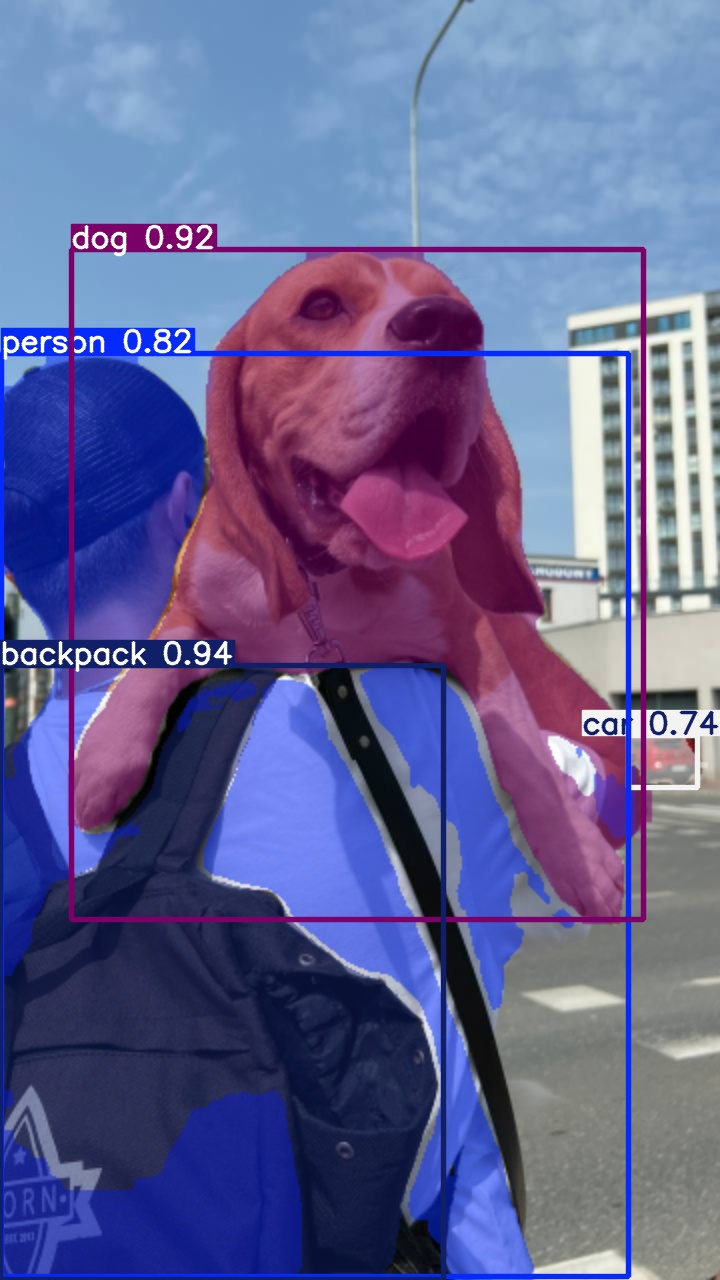

In [7]:
import os
from IPython.display import Image as IPyImage

HOME = os.getcwd()
file_path = os.path.join(HOME, 'runs', 'segment', 'predict', 'dog.jpg')
IPyImage(filename=file_path, width=600)

In [8]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11l-seg.pt')
image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]


0: 640x384 1 person, 1 car, 1 dog, 1 backpack, 109.4ms
Speed: 0.0ms preprocess, 109.4ms inference, 78.1ms postprocess per image at shape (1, 3, 640, 384)


In [9]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

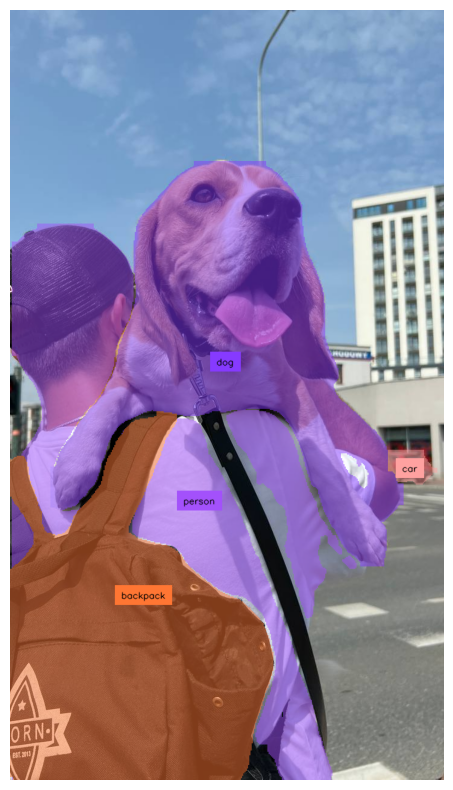

In [10]:
mask_annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK, text_position=sv.Position.CENTER)

annotated_image = image.copy()
annotated_image = mask_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

# Training Custom Dataset YOLO11 Instance Segmentation

In [26]:
import logging
logging.basicConfig(level=logging.INFO)

In [12]:
HOME = os.getcwd()
HOME

'C:\\Users\\LIK\\Documents\\GitHub\\segmentation-robot-navigation\\python-code'

In [13]:
import os
os.makedirs("datasets")

In [14]:
file_path = os.path.join(HOME, 'datasets')
print(file_path)

C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets


In [15]:
%cd {HOME}/datasets

C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets


In [16]:
%cd {HOME}

C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code


In [17]:
from roboflow import Roboflow
rf = Roboflow(api_key="uZ6Fr7pg6ezFrqbUPjJB")
project = rf.workspace("rameshprabha").project("drivable_area1")
version = project.version(8)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to drivable_area1-8 in yolov11:: 100%|████████████| 3855/3855 [00:01<00:00, 2426.19it/s]


In [19]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11s-seg.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="drivable_area1-8/data.yaml", epochs=100, imgsz=640)

Ultralytics 8.3.32  Python-3.12.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
engine\trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=drivable_area1-8/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

train: Scanning C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\drivable_area1-8\train


train: New cache created: C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\drivable_area1-8\train\labels.cache


val: Scanning C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\drivable_area1-8\valid\l

val: New cache created: C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\drivable_area1-8\valid\labels.cache



DEBUG:matplotlib.pyplot:Loaded backend Agg version v2.2.


Plotting labels to runs\segment\train2\labels.jpg... 


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\LIK\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\LIK\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\LIK\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', varian

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.15G     0.8636      1.999      1.262       1.37         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192       0.27      0.625      0.374      0.169      0.285      0.688      0.397      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.16G     0.8425      1.471     0.6586      1.336         12        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.262      0.719      0.292      0.135      0.293       0.74      0.332      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.22G     0.8268       1.45      0.621      1.312         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192       0.56      0.615       0.52      0.122      0.268      0.349      0.214     0.0683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.15G     0.8059      1.372     0.6009      1.287         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.867      0.974      0.971      0.698      0.862      0.953       0.97      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.24G     0.7464      1.301     0.5412      1.244          9        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.949      0.966       0.99       0.79      0.949      0.966       0.99      0.768



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.21G     0.7458        1.3     0.5282      1.253         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.958      0.944      0.984      0.833      0.963      0.952      0.986      0.803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.21G     0.7086      1.268      0.502      1.225         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.961      0.979      0.987       0.77      0.961      0.979      0.987      0.726



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.17G     0.6953      1.188     0.4783       1.21          8        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.959      0.979      0.981      0.858      0.959      0.979      0.981      0.826



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.24G     0.6534      1.113     0.4446      1.184         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.905      0.943      0.974      0.803      0.905      0.943      0.974      0.737



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.21G      0.649      1.116     0.4402      1.176         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.978          1      0.994       0.83      0.978          1      0.994      0.802



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.22G     0.6354      1.095     0.4429      1.169          5        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995       0.86      0.999          1      0.995      0.811



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.18G      0.629      1.095     0.4172       1.17          7        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.984      0.983      0.993      0.843      0.984      0.983      0.993      0.836



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.22G     0.6053      1.078      0.413      1.145          7        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.984          1      0.995      0.877      0.984          1      0.995      0.859



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.25G     0.6117      1.026     0.4058      1.148          9        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.985      0.969      0.994       0.85      0.985      0.969      0.994      0.827



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.19G     0.6058      1.012     0.4013      1.148         12        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.998          1      0.995      0.871      0.998          1      0.995      0.836



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.18G     0.6036      1.033     0.4028      1.154          8        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.996      0.984      0.994      0.856      0.996      0.984      0.994      0.847



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.24G     0.5735      1.017     0.3784      1.133         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.984      0.991      0.995      0.845      0.984      0.991      0.995      0.793



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.21G     0.5813      1.013     0.3719      1.122          8        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.871          1          1      0.995      0.862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.23G     0.5985      1.018     0.3951      1.135          7        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.892          1          1      0.995      0.858



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.15G     0.5681     0.9649      0.368      1.123         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.876      0.999          1      0.995       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.22G     0.5667     0.9566     0.3677      1.128          9        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.865          1          1      0.995      0.846



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.21G     0.5445      0.943     0.3511      1.104         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.902      0.999          1      0.995      0.879



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.21G     0.5584     0.9503      0.357      1.118          9        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.989       0.99      0.995      0.878      0.989       0.99      0.995      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100       5.2G     0.5486     0.9444     0.3459      1.106         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.894      0.999          1      0.995      0.873



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100       5.2G     0.5401     0.9384     0.3417      1.103         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.995          1      0.995      0.864      0.995          1      0.995      0.847



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.19G     0.5458     0.9503     0.3542      1.104         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.994          1      0.995        0.9      0.994          1      0.995      0.875



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.21G     0.5262     0.9212     0.3401       1.09         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.994          1      0.994      0.907      0.994          1      0.994      0.878



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100       5.2G     0.5254     0.8914      0.335      1.082         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995       0.89      0.999          1      0.995      0.876



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.22G     0.5077     0.8902     0.3255      1.079         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.994          1      0.995      0.906      0.994          1      0.995       0.87



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.23G      0.516     0.8962     0.3295      1.078          9        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.891      0.999          1      0.995      0.882



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.21G     0.5196     0.9015     0.3311      1.087         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.891      0.999          1      0.995      0.872



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100       5.2G     0.5102     0.8541     0.3225      1.078          8        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.907          1          1      0.995      0.877



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.22G     0.5189     0.8704     0.3296      1.088         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1      0.999      0.995      0.914          1      0.999      0.995      0.892



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.19G     0.4839     0.8359     0.3057      1.068          7        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1      0.999      0.995      0.908          1      0.999      0.995      0.879



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.21G     0.4955     0.8619     0.3056       1.07         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.909      0.999          1      0.995      0.887



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.15G     0.4946     0.8643      0.314      1.069          5        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.907          1          1      0.995      0.895



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.21G     0.4737     0.8181     0.3073      1.054         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.908      0.999          1      0.995       0.88



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.19G     0.4796      0.807     0.3034       1.06         12        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.998          1      0.995      0.914      0.998          1      0.995      0.892



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.23G     0.4828     0.8238     0.3028      1.067          8        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.912          1          1      0.995      0.889



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.18G     0.4686     0.8101     0.2967      1.052         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.914      0.999          1      0.995      0.886



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.22G     0.4702     0.8059      0.295      1.057          6        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999      0.995      0.995      0.915      0.999      0.995      0.995      0.882



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.21G     0.4679      0.793     0.3046      1.053          5        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.918      0.999          1      0.995      0.892



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.21G     0.4523     0.7941     0.2935      1.048          9        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.911      0.999          1      0.995      0.898



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.18G     0.4523     0.7846     0.2855      1.046         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.918          1          1      0.995      0.894



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.22G     0.4603     0.8178     0.2896      1.047          7        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.919      0.999          1      0.995      0.889



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.21G      0.457     0.7816      0.292      1.044          8        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192       0.99      0.994      0.995      0.907       0.99      0.994      0.995      0.891



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.21G     0.4381     0.7628     0.2752       1.03          9        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.911          1          1      0.995      0.891



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.17G     0.4494     0.7689      0.275      1.035         12        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.923          1          1      0.995      0.903



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.22G     0.4501     0.7746     0.2828      1.032         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1      0.999      0.995      0.917          1      0.999      0.995      0.898



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.19G     0.4423      0.761     0.2781      1.029         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995       0.92          1          1      0.995      0.902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.19G     0.4335     0.7449     0.2692       1.03         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999      0.995      0.995      0.928          1      0.999      0.995      0.897



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.17G     0.4277     0.7514     0.2731      1.021         12        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.998          1      0.995      0.921      0.998          1      0.995       0.89



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.22G     0.4329     0.7403     0.2683      1.029         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.917          1          1      0.995      0.893



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.21G     0.4266     0.7346     0.2666      1.025          8        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.916          1          1      0.995      0.893



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.21G     0.4196     0.7307     0.2579      1.018         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.927      0.999          1      0.995      0.898



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.18G     0.4164     0.7255     0.2614      1.017          9        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995       0.92          1          1      0.995      0.892



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.21G     0.4111     0.7086     0.2599       1.01         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.994          1      0.995      0.932      0.994          1      0.995      0.909



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.21G     0.4093     0.7296     0.2531      1.012         12        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.921          1          1      0.995      0.909



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.21G      0.414     0.7159     0.2572      1.012          7        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995       0.93      0.999          1      0.995      0.913



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.18G     0.3996     0.7026     0.2475      1.011         12        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.925      0.999          1      0.995      0.911



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.22G     0.3993     0.7031     0.2513      1.004         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.919          1          1      0.995      0.906



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.21G     0.4145     0.7093     0.2544      1.017          7        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.997          1      0.995      0.925      0.997          1      0.995      0.909



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.23G      0.394     0.6824     0.2514      1.008          7        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.923      0.999          1      0.995        0.9



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.17G     0.3878     0.6801      0.246     0.9987          9        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.934      0.999          1      0.995      0.906



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.22G     0.3845     0.6879     0.2445     0.9954          9        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.924      0.999          1      0.995      0.908



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.21G     0.3841     0.6755     0.2422     0.9936         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.929          1          1      0.995       0.91



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.21G     0.3812     0.6735     0.2341     0.9915         12        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.937          1          1      0.995      0.917



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.18G     0.3732     0.6634     0.2313     0.9892         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.923          1          1      0.995      0.913



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100       5.2G     0.3854      0.674     0.2356     0.9983         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.931      0.999          1      0.995      0.908



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.21G     0.3787     0.6611     0.2344      0.991         12        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.924      0.999          1      0.995      0.901



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.21G     0.3718     0.6637     0.2339     0.9881          9        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.926      0.999          1      0.995      0.911



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.19G     0.3718     0.6386     0.2255     0.9904          6        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.933          1          1      0.995      0.916



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100       5.2G     0.3656     0.6524     0.2254     0.9865         12        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.935          1          1      0.995      0.916



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.21G     0.3573      0.635     0.2228     0.9797         12        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.935          1          1      0.995      0.919



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.21G     0.3634     0.6351     0.2224     0.9874         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995       0.93          1          1      0.995      0.913



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.18G     0.3635     0.6187     0.2204     0.9858          6        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.938          1          1      0.995      0.919



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.23G     0.3441     0.6078     0.2138     0.9794          4        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.937          1          1      0.995      0.917



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.19G     0.3447     0.6112     0.2102     0.9789         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995       0.93          1          1      0.995      0.914



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.19G     0.3413     0.5969     0.2136     0.9709          9        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.929          1          1      0.995      0.918



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.18G     0.3399     0.6031     0.2113     0.9709         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.934          1          1      0.995      0.915



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100       5.2G     0.3481     0.6073     0.2165     0.9767         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.934          1          1      0.995      0.923



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.21G     0.3472     0.6207     0.2133     0.9779         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.935      0.999          1      0.995      0.924



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.19G     0.3375     0.5907     0.2073      0.967         10        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.932          1          1      0.995      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.17G     0.3304     0.5993     0.2056     0.9642         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.932      0.999          1      0.995       0.92



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100       5.2G     0.3235     0.5897      0.201     0.9592          9        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.929          1          1      0.995      0.916



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.23G     0.3285      0.594     0.2004      0.964          6        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.932          1          1      0.995      0.918



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.21G     0.3211      0.565      0.199     0.9543         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192      0.999          1      0.995      0.939      0.999          1      0.995      0.924



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.16G     0.3213       0.57      0.199      0.957         11        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.925          1          1      0.995      0.918



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.22G     0.3195     0.5571     0.1969      0.963          9        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.931          1          1      0.995      0.918



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.21G     0.3194     0.5534     0.1917     0.9601          9        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.931          1          1      0.995       0.92


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.13G     0.2259     0.4176     0.1817     0.9342          3        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.934          1          1      0.995      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.11G     0.2144     0.3997     0.1596     0.9321          3        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.938          1          1      0.995      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.12G     0.2173     0.3913     0.1631     0.9348          3        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.937          1          1      0.995      0.928



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.13G     0.2045     0.3916     0.1625     0.9246          3        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.935          1          1      0.995      0.925



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.13G     0.2069     0.3976     0.1591     0.9241          3        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.935          1          1      0.995      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.11G     0.1987     0.3852     0.1527     0.9231          3        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.939          1          1      0.995      0.928



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.12G     0.1864     0.3777     0.1496     0.9048          3        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.936          1          1      0.995      0.928



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.13G     0.1845     0.3735     0.1428     0.9046          3        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.937          1          1      0.995       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.13G     0.1826     0.3752     0.1401     0.9061          3        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.938          1          1      0.995       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.11G     0.1785      0.369     0.1443     0.9015          3        640: 100%|██████████| 109/109 [00:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        192        192          1          1      0.995      0.936          1          1      0.995      0.929



100 epochs completed in 1.129 hours.
Optimizer stripped from runs\segment\train2\weights\last.pt, 20.5MB
Optimizer stripped from runs\segment\train2\weights\best.pt, 20.5MB

Validating runs\segment\train2\weights\best.pt...
Ultralytics 8.3.32  Python-3.12.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP
DEBUG:matplotlib.pyplot:Loaded backend Agg version v2.2.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.2.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\LIK\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\LIK\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\

                   all        192        192          1          1      0.995      0.938          1          1      0.995      0.931


DEBUG:matplotlib.pyplot:Loaded backend Agg version v2.2.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\LIK\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\LIK\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 2.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\LIK\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGener

Speed: 0.3ms preprocess, 4.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\segment\train2


DEBUG:matplotlib.pyplot:Loaded backend Agg version v2.2.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\LIK\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\LIK\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Users\\LIK\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGener

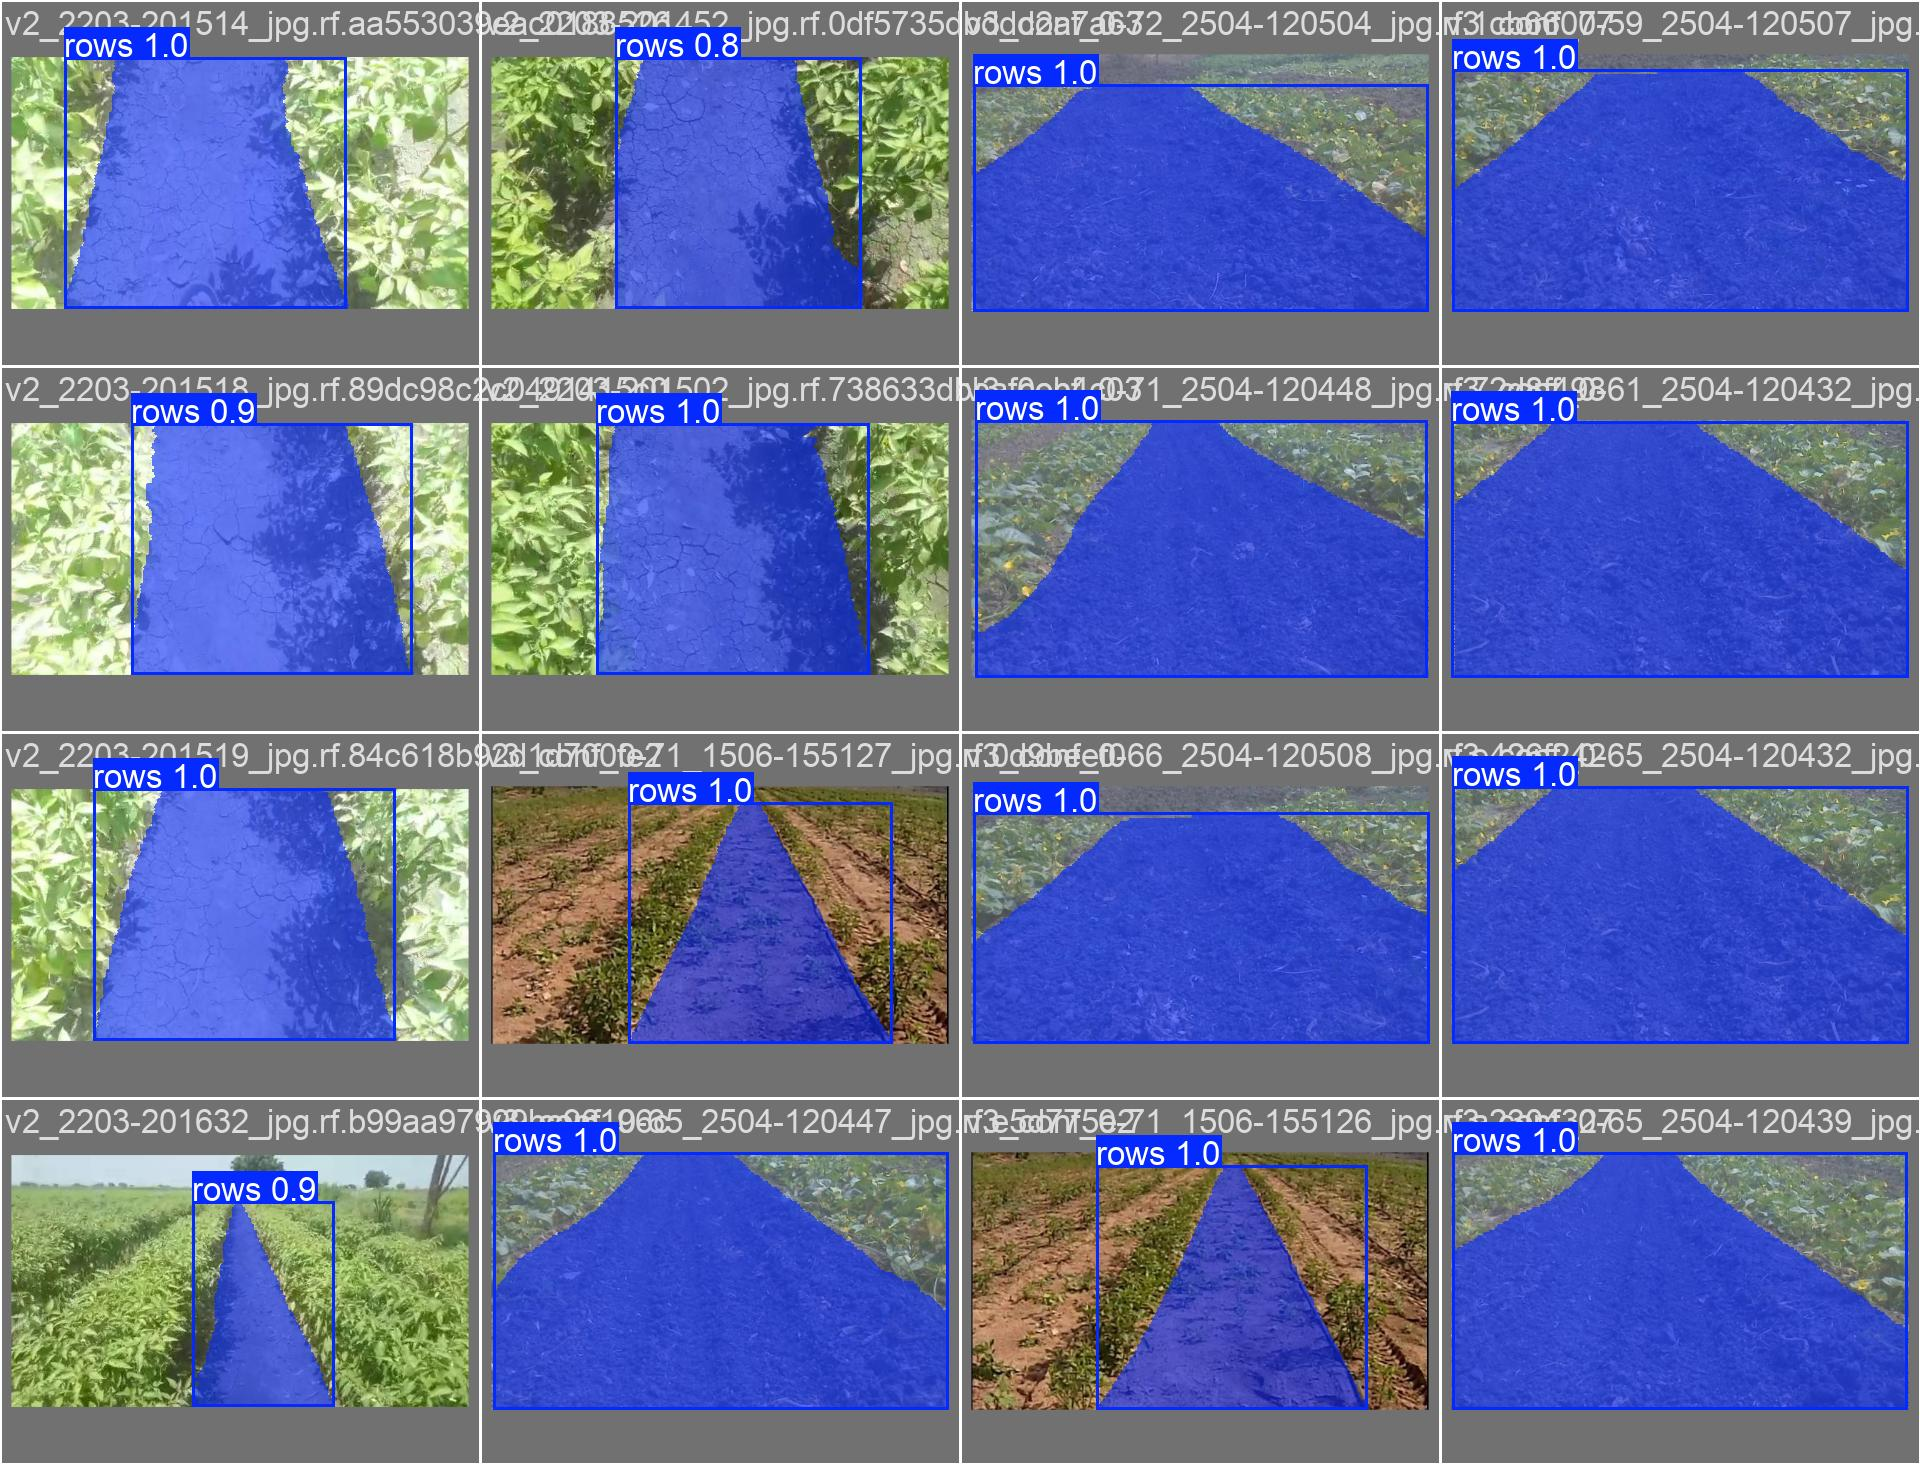

In [27]:
from IPython.display import Image as IPyImage

IPyImage(filename='runs/segment/train2/val_batch0_pred.jpg', width=600)

In [28]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolo11n-seg.pt")  # load an official model
model = YOLO("runs/segment/train2/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps  # a list contains map50-95(B) of each category
metrics.seg.map  # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps  # a list contains map50-95(M) of each category

Ultralytics 8.3.32  Python-3.12.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs


val: Scanning C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\drivable_area1-8\valid\l
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP
DEBUG:matplotlib.pyplot:Loaded backend Agg version v2.2.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend Agg version v2.2.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend Agg version v2.2.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend Agg version v2.2.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend Agg version v2.2.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline ve

                   all        192        192          1          1      0.995      0.937          1          1      0.995      0.931


DEBUG:matplotlib.pyplot:Loaded backend Agg version v2.2.
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001D12FB8F440>
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend Agg version v2.2.
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001D12F840380>
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


Speed: 0.7ms preprocess, 8.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\segment\val


array([    0.93051])

In [29]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolo11n-seg.pt")  # load an official model
model = YOLO("runs/segment/train2/weights/best.pt")  # load a custom model

# Predict with the model
results = model("datasets/dataset-robot-semprot/test/images/jal3-2-_out0135_jpg.rf.bc94f65ebc5f01d74a8b4339ae28966b.jpg")  # predict on an image


image 1/1 C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\dataset-robot-semprot\test\images\jal3-2-_out0135_jpg.rf.bc94f65ebc5f01d74a8b4339ae28966b.jpg: 480x640 1 rows, 78.5ms
Speed: 0.0ms preprocess, 78.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


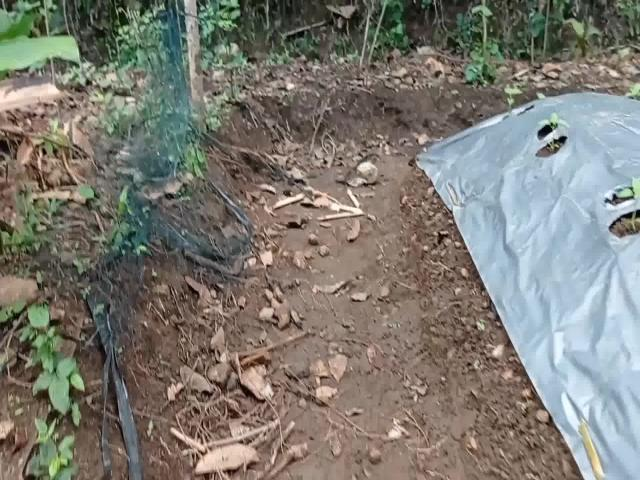

In [30]:
from IPython.display import Image as IPyImage

IPyImage(filename='datasets/dataset-robot-semprot/test/images/jal3-2-_out0135_jpg.rf.bc94f65ebc5f01d74a8b4339ae28966b.jpg', width=600)

In [31]:
!yolo task=segment mode=predict model="runs/segment/train2/weights/best.pt" conf=0.25 source='datasets/dataset-robot-semprot/test/images/jal3-2-_out0135_jpg.rf.bc94f65ebc5f01d74a8b4339ae28966b.jpg' save=True

Ultralytics 8.3.32 ðŸš€ Python-3.12.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs

image 1/1 C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\dataset-robot-semprot\test\images\jal3-2-_out0135_jpg.rf.bc94f65ebc5f01d74a8b4339ae28966b.jpg: 480x640 1 rows, 71.2ms
Speed: 2.4ms preprocess, 71.2ms inference, 94.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\segment\predict2
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/predict


In [34]:
!yolo task=segment mode=predict model=runs/segment/train2/weights/best.pt conf=0.25 source=datasets/dataset-robot-semprot/train/images save=True

Ultralytics 8.3.32 ðŸš€ Python-3.12.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs

image 1/1533 C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\dataset-robot-semprot\train\images\IMG_20231213_102113_jpg.rf.09a008c7f8a37c5e3159dd41050df311.jpg: 480x640 1 rows, 80.4ms
image 2/1533 C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\dataset-robot-semprot\train\images\IMG_20231213_102113_jpg.rf.2bf1e2dd3b5e5f9743fb83cb61005be6.jpg: 480x640 1 rows, 18.0ms
image 3/1533 C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\dataset-robot-semprot\train\images\IMG_20231213_102113_jpg.rf.5dcf8e18e27c56f76366bc08c7ba78cf.jpg: 480x640 1 rows, 5.8ms
image 4/1533 C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\dataset-robot-semprot\train\images\IMG_20231213_102115_jpg.rf.605618